In [70]:
import sys
sys.path.append('/Users/dorianfitton/Library/Mobile Documents/com~apple~CloudDocs/Documents/Cours_Télécom/fil_rouge/fil_rouge.nosync/epftoolbox/')

In [13]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt

from epftoolbox.evaluation import MAE, sMAPE, MAPE, rMAE
from epftoolbox.data import read_data_refreshed, read_local_data
import pandas as pd
import numpy as np
pd.options.display.max_rows=None

/Users/dorianfitton/opt/anaconda3/envs/bgd/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [18]:
forecast = pd.read_csv('/Users/dorianfitton/Library/Mobile Documents/com~apple~CloudDocs/Documents/Cours_Télécom/fil_rouge/fil_rouge.nosync/examples/experimental_files/fc_nl_datFR_BEGIN_None_YT2_CW1456.csv', index_col=0).dropna()
real_values = pd.read_csv('/Users/dorianfitton/Library/Mobile Documents/com~apple~CloudDocs/Documents/Cours_Télécom/fil_rouge/fil_rouge.nosync/examples/datasets/EPEX_FR 2.csv', index_col='Date', usecols=['Date','Price'])
forecast_dnn = pd.read_csv('/Users/dorianfitton/Library/Mobile Documents/com~apple~CloudDocs/Documents/Cours_Télécom/fil_rouge/fil_rouge.nosync/examples/experimental_files/fc_nl2_datFR_YT2_SF1_CW4_1new.csv', index_col=0).dropna()

In [19]:
forecast.index = pd.to_datetime(forecast.index).tz_localize(None)
real_values.index = pd.to_datetime(real_values.index).tz_localize(None)
forecast_dnn.index = pd.to_datetime(forecast_dnn.index).tz_localize(None)

In [ ]:
forecast_dnn

In [ ]:
real_values

In [76]:
np.array([forecast.values.squeeze(), ])

array([[[ 45.80030524,  44.0533362 ,  41.45051179, ...,  53.20017769,
          51.80097693,  51.92521314],
        [ 49.33770878,  46.52401179,  43.71146027, ...,  57.40667104,
          54.15794285,  53.94667322],
        [ 51.17652315,  48.14145168,  43.28385134, ...,  55.04226321,
          53.28899687,  52.61069061],
        ...,
        [ -7.20920375, -18.91576457, -36.4966158 , ...,  67.6756541 ,
          57.19058032,  42.17047962],
        [ 30.04163947,  27.79539889,  11.63676708, ...,  62.00095544,
          45.30816319,  30.9116937 ],
        [-12.30951494, -10.9509867 , -18.27052906, ...,  32.17819449,
          24.5920522 ,  15.43745328]]])

In [6]:
# Computing metrics up-to-current-date
MAE = np.zeros(len(forecast.index))
SMAPE = np.zeros(len(forecast.index))
i=0
for date in forecast.index:
    mae = np.mean(np.abs(np.array(forecast.loc[:date].values.squeeze()) - np.array(real_values.loc[date:date+datetime.timedelta(hours=23)].values).T))
    smape = np.mean(np.abs(np.array(forecast.loc[:date].values.squeeze()) - np.array(real_values.loc[date:date+datetime.timedelta(hours=23)].values).T) / ((np.abs(np.array(forecast.loc[:date].values.squeeze())) + np.abs(np.array(real_values.loc[date:date+datetime.timedelta(hours=23)].values).T)) / 2)) * 100
    SMAPE[i]=smape
    MAE[i]=mae
    i+=1


print('sMAPE: {:.2f}%  |  MAE: {:.3f}'.format(np.mean(SMAPE), np.mean(MAE)))

sMAPE: 68.93%  |  MAE: 113.682


In [7]:
MAE_DNN = np.zeros(len(forecast_dnn.index))
SMAPE_DNN = np.zeros(len(forecast_dnn.index))
i=0
for date in forecast_dnn.index:
    mae = np.mean(np.abs(np.array(forecast_dnn.loc[:date].values.squeeze()) - np.array(real_values.loc[date:date+datetime.timedelta(hours=23)].values).T))
    smape = np.mean(np.abs(np.array(forecast_dnn.loc[:date].values.squeeze()) - np.array(real_values.loc[date:date+datetime.timedelta(hours=23)].values).T) / ((np.abs(np.array(forecast_dnn.loc[:date].values.squeeze())) + np.abs(np.array(real_values.loc[date:date+datetime.timedelta(hours=23)].values).T)) / 2)) * 100
    SMAPE_DNN[i]=smape
    MAE_DNN[i]=mae
    i+=1


print('sMAPE: {:.2f}%  |  MAE: {:.3f}'.format(np.mean(SMAPE_DNN), np.mean(MAE_DNN)))

sMAPE: 48.53%  |  MAE: 39.765


In [ ]:
len(forecast.index)

728

In [ ]:
MAE

array([  4.45773122,   6.16920547,   5.89308363,  11.29161749,
        18.85687608,  21.26435137,   9.04758257,  10.29855315,
         7.00737198,   6.66892465,  10.25141358,  10.7563189 ,
        10.0646529 ,   9.93383575,   9.06426448,   7.71812779,
         6.78083197,  15.57050438,  20.62164473,  12.87377152,
        11.06980307,  12.40027908,   7.44974871,   7.41632336,
         7.07065445,   8.76023874,  12.9460794 ,  12.21963408,
        12.07128954,   8.06581785,  12.3140718 ,  16.85713905,
         9.1579439 ,   9.42513068,  20.36072429,  29.64506985,
        11.37751661,  11.76385187,  17.45661347,  23.38879051,
        10.17245408,   9.00501939,  11.68840101,   8.88591869,
         8.7533107 ,   9.57133463,  10.71236502,  10.36869376,
        24.04202511,  22.41468141,  10.43950447,  13.82358867,
        18.65847148,  11.39591731,  11.07631798,  12.80874648,
        15.16241226,  10.37910675,  10.16819878,   9.87855022,
         9.02858144,   9.23642305,  12.00536189,  11.21

In [80]:
d = {'sMAPE': SMAPE, 'MAE': MAE}
df_er_LEAR = pd.DataFrame(data=d['sMAPE'], index= forecast.index)

Text(0.5, 1.0, 'LEAR ERRORS')

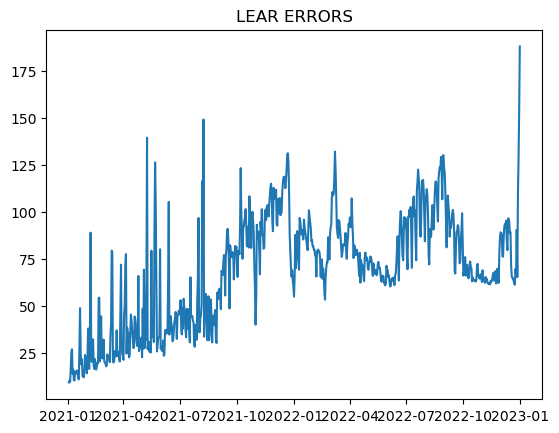

In [81]:
plt.plot(df_er_LEAR)
plt.title('LEAR ERRORS')

In [7]:
d_DNN = {'sMAPE_DNN': SMAPE_DNN, 'MAE_DNN': MAE_DNN}
df_er_DNN = pd.DataFrame(data=d_DNN['sMAPE_DNN'], index= forecast_dnn.index)
plt.plot(df_er_DNN)
plt.title('DNN ERRORS')
plt.show()

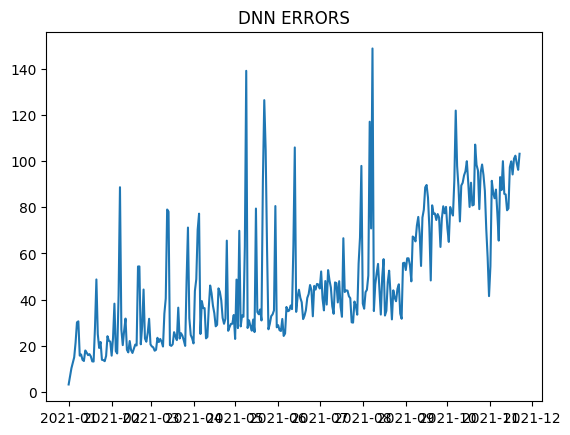

In [8]:
plt.plot(df_er_DNN)
plt.title('DNN ERRORS')
plt.show()

In [8]:
MAE(forecast_dnn.loc[:date].values.squeeze(), real_values.loc[date:date+datetime.timedelta(hours=23)].values.T)

TypeError: 'numpy.ndarray' object is not callable

2021-01-01 00:00:00
2021-11-22 00:00:00
./examples/datasets
./examples/experimental_files
                           Exogenous 2   Exogenous 1    Price
2017-01-01 00:00:00+00:00      73650.0  69539.000000    58.23
2017-01-01 01:00:00+00:00      72350.0  67376.000000    51.95
2017-01-01 02:00:00+00:00      68750.0  65412.000000    47.27
2017-01-01 03:00:00+00:00      65900.0  64557.000000    45.49
2017-01-01 04:00:00+00:00      65000.0  64552.000000    44.50
2017-01-01 05:00:00+00:00      65250.0  64695.000000    44.50
2017-01-01 06:00:00+00:00      65550.0  64956.000000    44.72
2017-01-01 07:00:00+00:00      66100.0  64938.000000    44.22
2017-01-01 08:00:00+00:00      66750.0  65526.000000    42.06
2017-01-01 09:00:00+00:00      68800.0  66426.000000    45.70
2017-01-01 10:00:00+00:00      70050.0  67533.000000    47.91
2017-01-01 11:00:00+00:00      71050.0  68066.000000    49.57
2017-01-01 12:00:00+00:00      71100.0  68120.000000    48.69
2017-01-01 13:00:00+00:00      67750.0  65

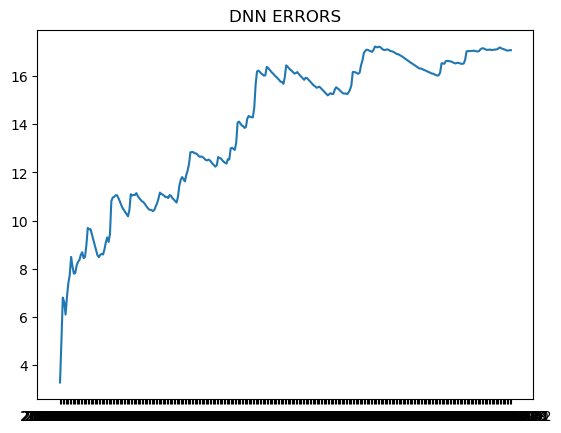

In [36]:
import os

forecast = pd.read_csv('/Users/dorianfitton/Library/Mobile Documents/com~apple~CloudDocs/Documents/Cours_Télécom/fil_rouge/fil_rouge.nosync/examples/experimental_files/fc_nl2_datFR_YT2_SF1_CW4_1new.csv', index_col=0).dropna()

begin_test_date = forecast_dnn.index[0]
print(begin_test_date)
end_test_date = forecast_dnn.index[-1]
print(end_test_date)
path_datasets_folder = os.path.join('.', 'examples/datasets')
print(path_datasets_folder)
path_recalibration_folder = os.path.join('.', 'examples/experimental_files')
print(path_recalibration_folder)

dataset = 'FR'
years_test = 2
calibration_window = 4

df_train, df_test = read_local_data(dataset='FR', path = path_datasets_folder , years_test=None,
                              begin_test_date=begin_test_date, end_test_date=end_test_date)


# Defining unique name to save the forecast
forecast_file_name = 'fc_nl' + '_dat' + str(dataset) +'_BEGIN_' + str(begin_test_date) +'_YT' + str(years_test) + \
                     '_CW' + str(calibration_window) + '.csv'

forecast_file_path = os.path.join(path_recalibration_folder, forecast_file_name)


# Defining empty forecast array and the real values to be predicted in a more friendly format
#forecast = pd.DataFrame(index=df_test.index[::24], columns=['h' + str(k) for k in range(24)])
real_values = df_test.loc[:, ['Price']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=forecast.index, columns=forecast.columns)

forecast_dates = forecast.index

MAE_DNN = np.zeros(len(forecast.index))
SMAPE_DNN = np.zeros(len(forecast.index))
i=0
for date in forecast.index:
    mae = np.mean(MAE(forecast.loc[:date].values.squeeze(), real_values.loc[:date].values)) 
    smape = np.mean(sMAPE(forecast.loc[:date].values.squeeze(), real_values.loc[:date].values)) * 100

    SMAPE_DNN[i]=smape
    MAE_DNN[i]=mae
    i+=1


print('sMAPE: {:.2f}%  |  MAE: {:.3f}'.format(np.mean(SMAPE_DNN), np.mean(MAE_DNN)))

d_DNN = {'sMAPE_DNN': SMAPE_DNN, 'MAE_DNN': MAE_DNN}
df_er_DNN = pd.DataFrame(data=d_DNN['sMAPE_DNN'], index= forecast.index)
plt.plot(df_er_DNN)
plt.title('DNN ERRORS')
plt.show()


2021-01-03
2022-12-31
./examples/datasets
./examples/experimental_files
                           Exogenous 2   Exogenous 1    Price
2017-01-01 00:00:00+00:00      73650.0  69539.000000    58.23
2017-01-01 01:00:00+00:00      72350.0  67376.000000    51.95
2017-01-01 02:00:00+00:00      68750.0  65412.000000    47.27
2017-01-01 03:00:00+00:00      65900.0  64557.000000    45.49
2017-01-01 04:00:00+00:00      65000.0  64552.000000    44.50
2017-01-01 05:00:00+00:00      65250.0  64695.000000    44.50
2017-01-01 06:00:00+00:00      65550.0  64956.000000    44.72
2017-01-01 07:00:00+00:00      66100.0  64938.000000    44.22
2017-01-01 08:00:00+00:00      66750.0  65526.000000    42.06
2017-01-01 09:00:00+00:00      68800.0  66426.000000    45.70
2017-01-01 10:00:00+00:00      70050.0  67533.000000    47.91
2017-01-01 11:00:00+00:00      71050.0  68066.000000    49.57
2017-01-01 12:00:00+00:00      71100.0  68120.000000    48.69
2017-01-01 13:00:00+00:00      67750.0  65870.000000    46.9

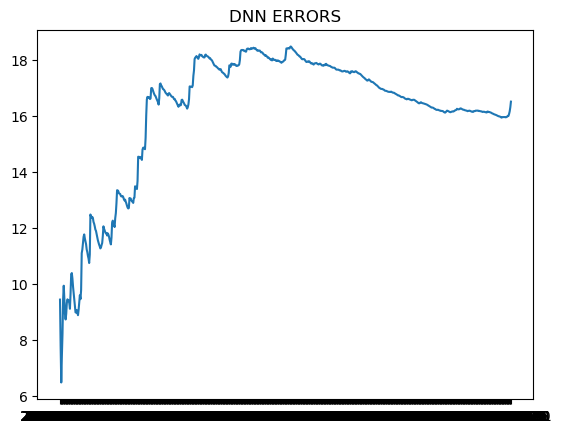

In [38]:
import os

forecast = pd.read_csv('/Users/dorianfitton/Library/Mobile Documents/com~apple~CloudDocs/Documents/Cours_Télécom/fil_rouge/fil_rouge.nosync/examples/experimental_files/fc_nl_datFR_BEGIN_None_YT2_CW1456.csv', index_col=0).dropna()

begin_test_date = forecast_dnn.index[0]
print(begin_test_date)
end_test_date = forecast_dnn.index[-1]
print(end_test_date)
path_datasets_folder = os.path.join('.', 'examples/datasets')
print(path_datasets_folder)
path_recalibration_folder = os.path.join('.', 'examples/experimental_files')
print(path_recalibration_folder)

dataset = 'FR'
years_test = 2
calibration_window = 4

df_train, df_test = read_local_data(dataset='FR', path = path_datasets_folder , years_test=None,
                              begin_test_date=begin_test_date, end_test_date=end_test_date)


# Defining unique name to save the forecast
forecast_file_name = 'fc_nl' + '_dat' + str(dataset) +'_BEGIN_' + str(begin_test_date) +'_YT' + str(years_test) + \
                     '_CW' + str(calibration_window) + '.csv'

forecast_file_path = os.path.join(path_recalibration_folder, forecast_file_name)


# Defining empty forecast array and the real values to be predicted in a more friendly format
#forecast = pd.DataFrame(index=df_test.index[::24], columns=['h' + str(k) for k in range(24)])
real_values = df_test.loc[:, ['Price']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=forecast.index, columns=forecast.columns)

forecast_dates = forecast.index

MAE_DNN = np.zeros(len(forecast.index))
SMAPE_DNN = np.zeros(len(forecast.index))
i=0
for date in forecast.index:
    mae = np.mean(MAE(forecast.loc[:date].values.squeeze(), real_values.loc[:date].values)) 
    smape = np.mean(sMAPE(forecast.loc[:date].values.squeeze(), real_values.loc[:date].values)) * 100

    SMAPE_DNN[i]=smape
    MAE_DNN[i]=mae
    i+=1


print('sMAPE: {:.2f}%  |  MAE: {:.3f}'.format(np.mean(SMAPE_DNN), np.mean(MAE_DNN)))

d_DNN = {'sMAPE_DNN': SMAPE_DNN, 'MAE_DNN': MAE_DNN}
df_er_DNN = pd.DataFrame(data=d_DNN['sMAPE_DNN'], index= forecast.index)
plt.plot(df_er_DNN)
plt.title('DNN ERRORS')
plt.show()

